In [1]:
import matplotlib.pyplot as plt

In [2]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np


def mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = './mnist/'

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784)

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

#         def _onehot(integer_labels):
#             """Return matrix whose rows are onehot encodings of integers."""
#             n_rows = len(integer_labels)
#             n_cols = integer_labels.max() + 1
#             onehot = np.zeros((n_rows, n_cols), dtype='uint8')
#             onehot[np.arange(n_rows), integer_labels] = 1
#             return onehot

        return integer_labels

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = mnist()

In [4]:
train_images.shape

(60000, 784)

In [5]:
train_images = train_images.reshape(-1, 28, 28, 1)

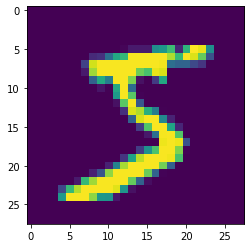

In [6]:
plt.imshow(train_images[0])

In [ ]:
train_images

In [7]:
train_images = np.concatenate([train_images]*3, axis = 3)

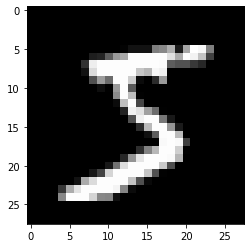

In [8]:
plt.imshow(train_images[0])

In [9]:
train_images.shape

(60000, 28, 28, 3)

In [10]:
img = train_images[0]

In [11]:
img.shape

(28, 28, 3)

In [12]:
from PIL import Image

In [13]:
pimg = Image.fromarray(img.astype(np.uint8))

In [ ]:
plt.imshow(img.astype(np.uint8))

In [ ]:
pimg.show()

In [ ]:
pimg = pimg.resize((32, 32))

In [ ]:
pimg.show()

In [ ]:
train_labels[0]

In [15]:
np.array(pimg)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)